<a href="https://colab.research.google.com/github/mthomp89/MSDS462/blob/master/Neural_Network_Modeling_on_the_Fashion_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network Modeling on the Fashion MNIST Dataset**
---

## Project Nature and Content
**Capture research question
Explain methodology and selection of network**

### Objective
Understand the reasoning behind selecting the final structure of the network. I will do this by assessing the behavior of the hidden nodes, and explaining the kinds of features that are being generalized through successive layers. 

### Deliverables
A concise report summarizing the following


1. The research question
2. Final network architecture
3. Problems that were encountered
4. Identification of key insights
5. Interpretation of analytic findings
6. Conclusions

### Dataset
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

##### License

The MIT License (MIT) Copyright © 2017 Zalando SE, https://tech.zalando.com

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# Environment Setup and Utilities



In [0]:
!pip install shap

# Imports
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report 
import pandas as pd


import shap
# https://shap.readthedocs.io/en/latest/
# https://github.com/slundberg/shap
# http://papers.nips.cc/paper/7062-a-unified-approach-to-interpreting-model-predictions.pdf

# Supress deprecation warnings
import logging
logging.getLogger('tensorflow').disabled = True



     |████████████████████████████████| 266kB 4.4MB/s 
  Created wheel for shap: filename=shap-0.34.0-cp36-cp36m-linux_x86_64.whl size=383170 sha256=1c591e2cc3f5732bf8d8c24d23ee56c2856b01d3b79debcdddd50e32b8e05e83
  Stored in directory: /root/.cache/pip/wheels/28/7e/28/57bc9fcb77579b0df6561298648249370648c0b91dfe42c8ec
Successfully built shap


## Load Data

In [0]:
# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Class names are not included, need to create them to plot the images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


# EDA

In [0]:
# Print data shapes
print("Shape of Training Image Data: " + str(x_train.shape))
print("Shape of Training Class Data: " + str(y_train.shape))
print("Shape of Test Image Data: " + str(x_test.shape))
print("Shape of Test Class Data: " + str(y_test.shape))

Shape of Training Image Data: (60000, 28, 28)
Shape of Training Class Data: (60000,)
Shape of Test Image Data: (10000, 28, 28)
Shape of Test Class Data: (10000,)


## Visualize first 25 images from training data


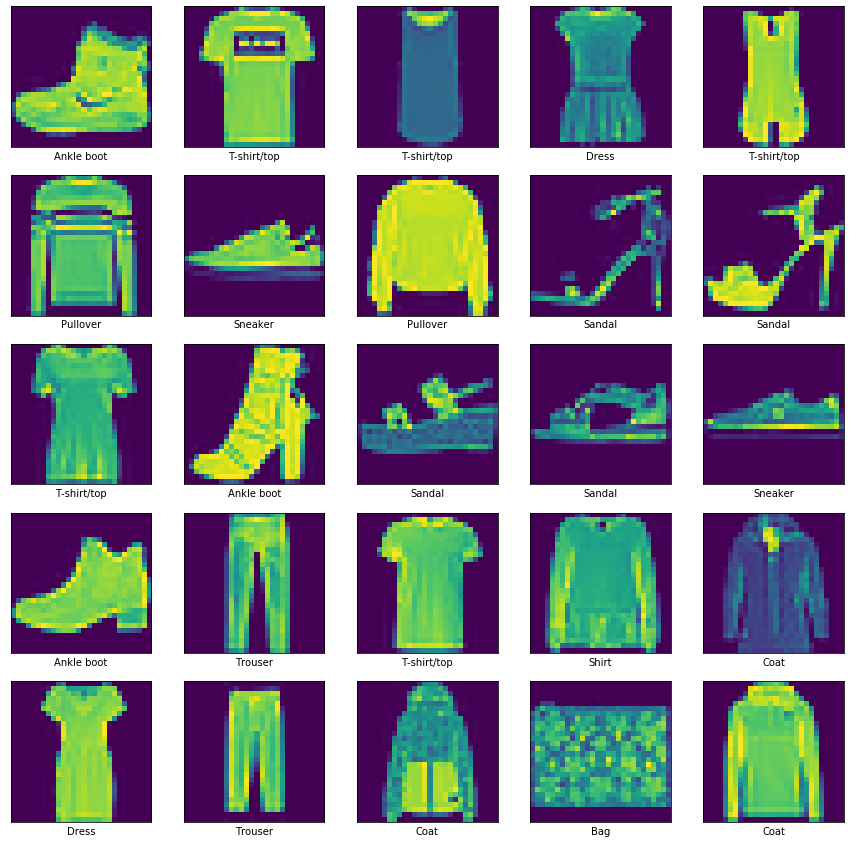

In [0]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

## Visualize image with pixel values


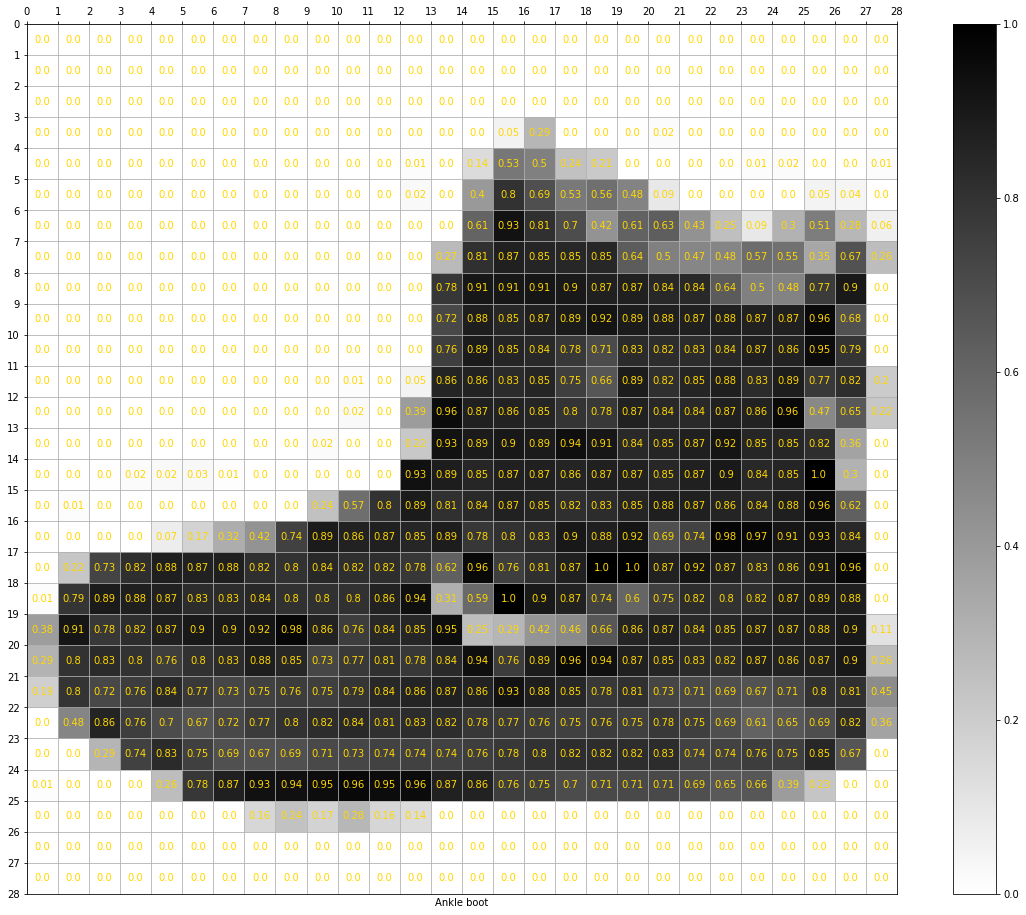

In [0]:
# View first image and classname in the dataset 
plt.figure(figsize=(20,16))
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.xlabel(class_names[y_train[0]])
plt.colorbar()
plt.grid(True)
plt.rc('grid', linestyle="-", color='grey')

ax = plt.gca()
ax.set_xticks(np.arange(-.5, 28, 1))
ax.set_yticks(np.arange(-.5, 28, 1))
ax.set_xticklabels(np.arange(0, 29, 1))
ax.set_yticklabels(np.arange(0, 29, 1))
ax.xaxis.tick_top()

# Overlay pixel values
for i in range(28):
    for j in range(28):
        text = ax.text(j, i, round(x_train[0][i, j], 2),
                       ha="center", va="center", color="gold")
        
        
plt.show()

In [0]:
# View first image and classname in the dataset 
from IPython.display import display

print("Shape for dataset: {}".format(x_train.shape))
print("Labels: {}".format(y_train))

# Single Fashion-MNIST article
single = x_train[0]
print("Shape for single: {}".format(single.shape))

display(pd.DataFrame(single.reshape(28,28)))

Shape for dataset: (60000, 28, 28)
Labels: [9 0 0 ... 3 0 5]
Shape for single: (28, 28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.000000,0.000000,0.050980,0.286275,0.000000,0.000000,0.003922,0.015686,0.000000,0.000000,0.000000,0.000000,0.003922,0.003922,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011765,0.000000,0.141176,0.533333,0.498039,0.243137,0.211765,0.000000,0.000000,0.000000,0.003922,0.011765,0.015686,0.000000,0.000000,0.011765
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023529,0.000000,0.400000,0.800000,0.690196,0.525490,0.564706,0.482353,0.090196,0.000000,0.000000,0.000000,0.000000,0.047059,0.039216,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.607843,0.925490,0.811765,0.698039,0.419608,0.611765,0.631373,0.427451,0.250980,0.090196,0.301961,0.509804,0.282353,0.058824
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.000000,0.270588,0.811765,0.874510,0.854902,0.847059,0.847059,0.639216,0.498039,0.474510,0.478431,0.572549,0.552941,0.345098,0.674510,0.258824
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.003922,0.003922,0.000000,0.784314,0.909804,0.909804,0.913725,0.898039,0.874510,0.874510,0.843137,0.835294,0.643137,0.498039,0.482353,0.768627,0.898039,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.717647,0.882353,0.847059,0.874510,0.894118,0.921569,0.890196,0.878431,0.870588,0.878431,0.866667,0.874510,0.960784,0.678431,0.000000


# Model 1: **Simple Three Layer CNN**

In [0]:
# Model a simple 3-layer neural network
cnn3 = tf.keras.models.Sequential([
                                   tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                   ])

cnn3.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

cnn3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


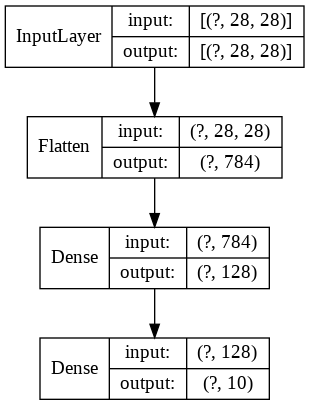

In [0]:
# Visualize model
tf.keras.utils.plot_model(cnn3, show_shapes=True, show_layer_names=False)

## Training

In [0]:
# Empty color dimension 
#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)

# Train the CNN on the training data
history_3 = cnn3.fit(x_train, y_train,
                      batch_size=256,
                      epochs=10,
                      validation_split=0.2,
                      verbose=1
                      )



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 47us/sample - loss: 0.6518 - acc: 0.7802 - val_loss: 0.4828 - val_acc: 0.8334
Epoch 2/10
48000/48000 [==============================] - 1s 12us/sample - loss: 0.4426 - acc: 0.8470 - val_loss: 0.4498 - val_acc: 0.8377
Epoch 3/10
48000/48000 [==============================] - 1s 12us/sample - loss: 0.4001 - acc: 0.8603 - val_loss: 0.3970 - val_acc: 0.8607
Epoch 4/10
48000/48000 [==============================] - 1s 12us/sample - loss: 0.3714 - acc: 0.8695 - val_loss: 0.3792 - val_acc: 0.8671
Epoch 5/10
48000/48000 [==============================] - 1s 13us/sample - loss: 0.3536 - acc: 0.8750 - val_loss: 0.3698 - val_acc: 0.8664
Epoch 6/10
48000/48000 [==============================] - 1s 13us/sample - loss: 0.3371 - acc: 0.8807 - val_loss: 0.3812 - val_acc: 0.8620
Epoch 7/10
48000/48000 [==============================] - 1s 12us/sample - loss: 0.3241 - acc: 0.8841 - val_loss: 0.

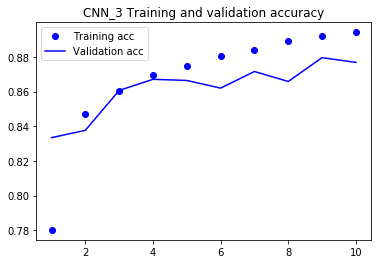

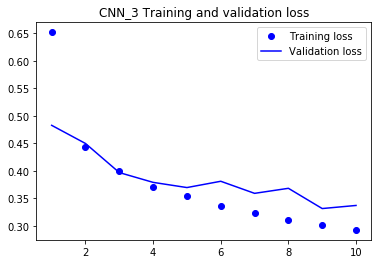

In [0]:
# Plot accuracy and validation curves
acc = history_3.history['acc']
val_acc = history_3.history['val_acc']
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('CNN_3 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('CNN_3 Training and validation loss')
plt.legend()

plt.show()

## Evaluate Model

In [0]:
# Get Model Predictions for test data
predicted_classes = cnn3.predict_classes(x_test)
print(classification_report(y_test, predicted_classes, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.73      0.79      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.81      0.74      0.78      1000
       Dress       0.80      0.92      0.86      1000
        Coat       0.78      0.81      0.80      1000
      Sandal       0.96      0.96      0.96      1000
       Shirt       0.65      0.71      0.68      1000
     Sneaker       0.95      0.93      0.94      1000
         Bag       0.96      0.97      0.97      1000
  Ankle boot       0.94      0.97      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



# Model 2: **Six Convolutional Layer CNN**

In [0]:
# Defining the model
model = tf.keras.models.Sequential()

# Convolutional layer to extract features by sliding a convolution filter 
# over the input image
model.add(
    tf.keras.layers.Conv2D(
        filters=32, # How many filters we will learn 
        kernel_size=(3, 3), # Size of feature map that will slide over image
        strides=(1, 1), 
        padding='valid', 
        activation='relu', # Rectified Linear Unit Activation Function
        input_shape=(28, 28, 1) # The expected input shape for this layer
    )
) 

# Maxpooling layer to reduce dimensionality of each feature
model.add(
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2), # Size feature will be mapped to
        strides=(2, 2) # How the pool "steps" across the feature
    )
)
          
# Dropout layer to mitigate risk of overfitting and force the model to learn 
# multiple representations of the same data by randomly disabling neurons 
model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

# Flattened to a 1D vector 
model.add(
    tf.keras.layers.Flatten()
)

# Dense (interconnected) layer for mapping derived features 
model.add(
    tf.keras.layers.Dense(
        units=128, # Output shape
        activation='relu' # Rectified Linear Unit Activation Function
    )
)

# Dense layer with the 10 outputs and softmax activation
# Softmax activation calculates output based on the probabilities 
model.add(
    tf.keras.layers.Dense(
        units=10, # Output shape
        activation='softmax' # Softmax Activation Function
    )
)

# Build the model
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimizer function
    metrics=['accuracy'] # reporting metric
)

# Display a summary of the models structure
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

## Training

In [0]:
# Empty color dimension 
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

history = model.fit(
    
      # Training data : features (images) and classes.
      x_train, y_train,                    
      batch_size=256, 
      epochs=10, 
      validation_split=0.2, 
      verbose=1) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 117us/sample - loss: 0.5503 - acc: 0.8066 - val_loss: 0.4030 - val_acc: 0.8565
Epoch 2/10
48000/48000 [==============================] - 1s 21us/sample - loss: 0.3644 - acc: 0.8717 - val_loss: 0.3375 - val_acc: 0.8821
Epoch 3/10
48000/48000 [==============================] - 1s 21us/sample - loss: 0.3234 - acc: 0.8845 - val_loss: 0.3086 - val_acc: 0.8925
Epoch 4/10
48000/48000 [==============================] - 1s 21us/sample - loss: 0.2960 - acc: 0.8941 - val_loss: 0.2964 - val_acc: 0.8936
Epoch 5/10
48000/48000 [==============================] - 1s 20us/sample - loss: 0.2757 - acc: 0.9009 - val_loss: 0.2831 - val_acc: 0.8997
Epoch 6/10
48000/48000 [==============================] - 1s 20us/sample - loss: 0.2610 - acc: 0.9064 - val_loss: 0.2719 - val_acc: 0.9010
Epoch 7/10
48000/48000 [==============================] - 1s 21us/sample - loss: 0.2443 - acc: 0.9124 - val_loss: 0

## Evaluate

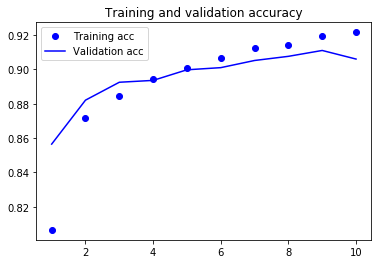

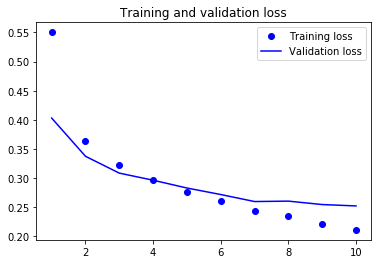

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
# Get Model Predictions for test data
predicted_classes = model.predict_classes(x_test)
print(classification_report(y_test, predicted_classes, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.87      0.86      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.86      0.84      0.85      1000
       Dress       0.91      0.91      0.91      1000
        Coat       0.79      0.91      0.85      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.80      0.66      0.72      1000
     Sneaker       0.96      0.94      0.95      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



## Visualise the Model

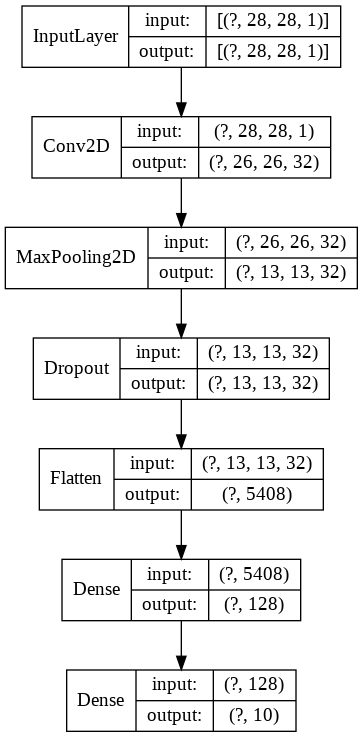

In [0]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

## View examples of incorrectly classified test data

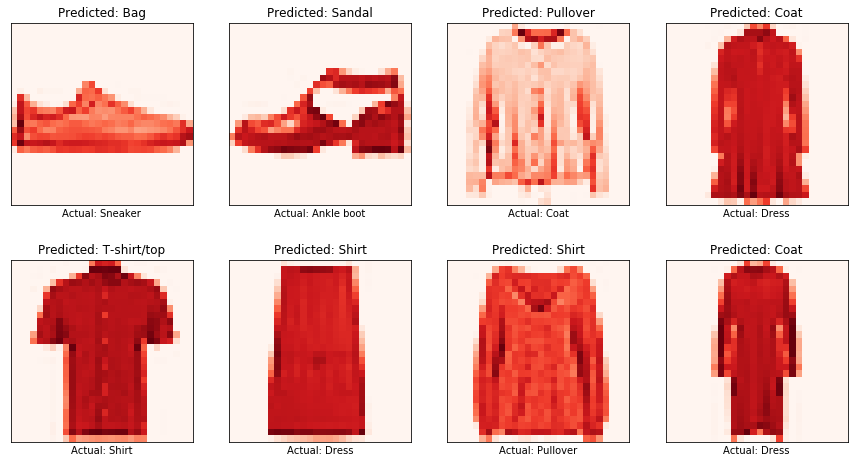

In [0]:
incorrect = np.nonzero(predicted_classes!=y_test)[0]

# Display the first 8 incorrectly classified images from the test data set
plt.figure(figsize=(15, 8))
for j, incorrect in enumerate(incorrect[0:8]):
    plt.subplot(2, 4, j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[incorrect].reshape(28, 28), cmap="Reds")
    plt.title("Predicted: {}".format(class_names[predicted_classes[incorrect]]))
    plt.xlabel("Actual: {}".format(class_names[y_test[incorrect]]))

## Print Feature Maps from the Convolutional Layer

Inspired by this blogpost: https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0.


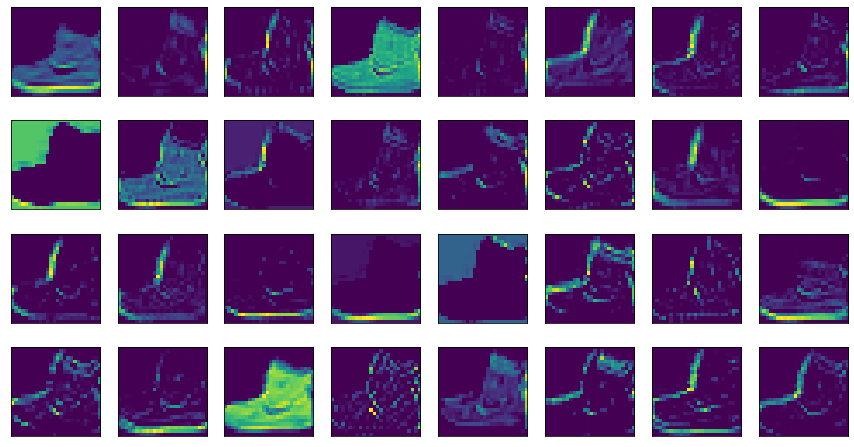

In [0]:
# The layer we want to copy from the trained CNN
layer_name = 'conv2d' 

# Get the list of layers for the existing model
layer_dict = {layer.name : layer for layer in model.layers}

# Create a copy of our existing model containing just the Conv2D Layer
modelslice = tf.keras.Model(inputs=model.inputs, outputs=layer_dict[layer_name].output)

# Choose an image (0 to 59999) from the training set
image = x_train[0] 

# Add the extra dimension expected by the slice
image = np.expand_dims(image, axis=0)

# Send the image through the model
feature_maps = modelslice.predict(image)

plt.figure(figsize=(15, 8))
    
# Assuming 32 feature maps
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(feature_maps[0, :, :, i-1], cmap='viridis')

In [0]:
# Select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

# Explain predictions of the model on three images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(x_test[111:115])

Using TensorFlow backend.


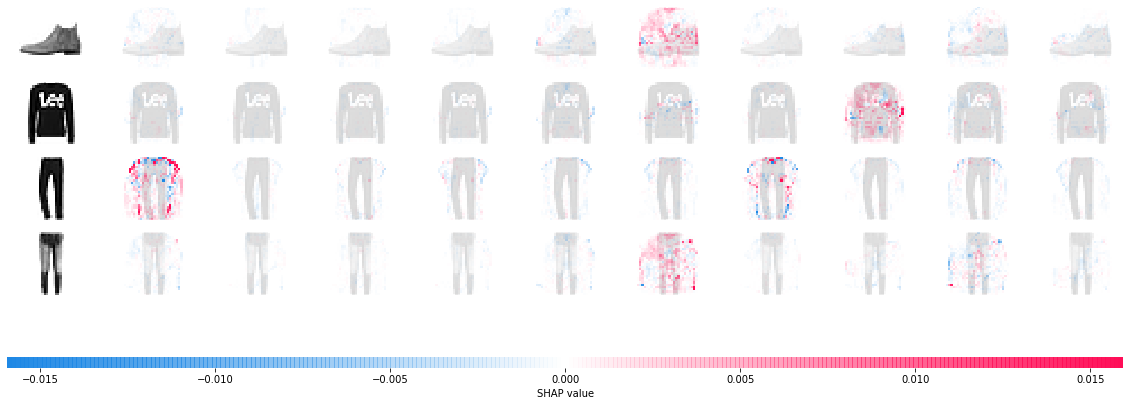

In [0]:
# plot the feature attributions
shap.image_plot(shap_values, -x_test[0:4])